In [5]:
import numpy as np
import pandas as pd
import json

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
fprime = 'GCAGTGAAAGAGTTCTTCGGTTCCA'
rprime = 'TCTGACCCGTGAACGTGCA'

target = 'GCAGTGAAAGAGTTCTTCGGTTCCAGCCAGCTGTCTCAGTTTATGGACCAGAACAACCCGCTGTCTGAGATTACGCACAAACGTCGTATCTCCGCACTCGGCCCAGGCGGTCTGACCCGTGAACGTGCA'

table = { 
            'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
            'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
            'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
            'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
            'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
            'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
            'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
            'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
            'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
            'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
            'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
            'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
            'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
            'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
            'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
            'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W', 
        } 

In [7]:
mut_table = pd.read_csv('~/projects/2020-06-30_MAGE-Seq/specific_codons/specific_codons.csv')
mut_table['num'] = mut_table['num'] - 500

mut_dict = {}

mut_dict[''] = 0 #for wt
for a, b in zip(mut_table.num, mut_table.codon):
    mut_dict[str(a) + '_' + b] = 0

In [8]:
samples = ['ky01', 'ky02', 'ky03', 'ky04', 'ky05', 'ky06', 'ky07', 'ky08', 'ky09', 'ky10', 'ky11', 'ky12', 'ky13', 'ky14', 'ky15']

dics = []

targetstart = 0
targetend = len(target)

for x in samples:
    print ('Working on sample ' +x)
    
    sn = pd.read_csv('data/'+x+'/barcodes_majority0.txt', sep='\t', header=None, names=['r', 'barcode', 'sequence', 'snvs', 'snv'])
    
    mut_dic = mut_dict.copy()
    
    j = 0
    for seq in sn.sequence:
        
        muts = []
        for i in range(targetstart, targetend, 3):
            
            codon = seq[i:i+3]
            
            if codon in table:
                if table[target[i:i+3]] != table[codon]:
                    mut = str(int(i/3)+1) + '_' + codon
                    muts.append(mut)
            
        muts = ', '.join(muts)
        #print(muts)

        if muts in mut_dic:
            mut_dic[muts] += 1
        else:
            mut_dic[''] += 1
            
    dics.append(mut_dic)

Working on sample ky01
Working on sample ky02
Working on sample ky03
Working on sample ky04
Working on sample ky05
Working on sample ky06
Working on sample ky07
Working on sample ky08
Working on sample ky09
Working on sample ky10
Working on sample ky11
Working on sample ky12
Working on sample ky13
Working on sample ky14
Working on sample ky15


In [9]:
dfs = []

for mut_dic in dics:
    
    df = pd.DataFrame.from_dict(mut_dic, orient='index').reset_index()
    #df.iloc[:, 1] = df.iloc[:, 1]/df.iloc[:, 1].sum()
    
    df.loc[:,'AA'] = df['index'].str.split('_').str[1]
    aa = []
    for a in df.loc[:,'AA']:
        if a in table:
            aa.append(table[a])
        else:
            aa.append('')
    df.loc[:,'AA'] = aa
    
    df.loc[:,'num'] = df['index'].str.split('_').str[0]
    df = df[['num', 'AA', 0]]
    df.columns = ['num', 'AA', 'occurences']

    df['num'] = pd.to_numeric(df.num)
    df = df[~df.num.isna()]
    df = df.pivot_table(index='num', columns='AA', values='occurences')
    df.index = df.index.astype(int)
    
    df = df/df.sum().sum()
    
    dfs.append(df)

0.0005454652671305579


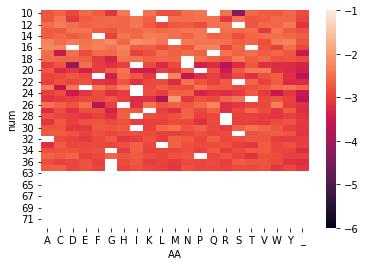

0.0008506322487772161


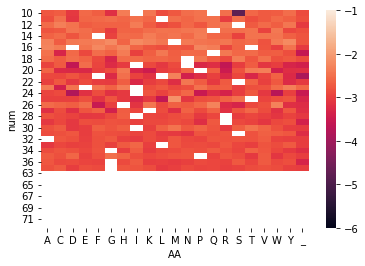

0.0006723872950819672


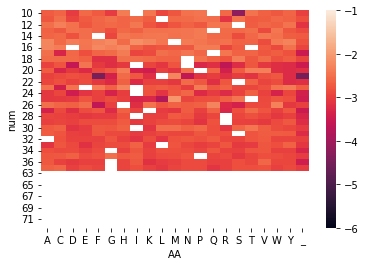

0.0002175805047867711


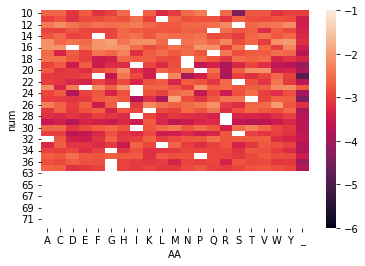

0.0003454478314214583


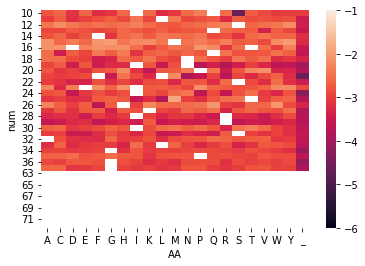

0.00033506643558636626


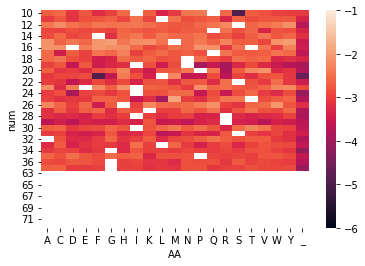

3.372984641676598e-05


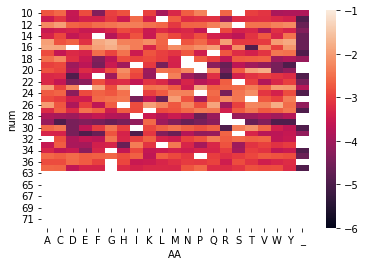

2.2420016590812277e-05


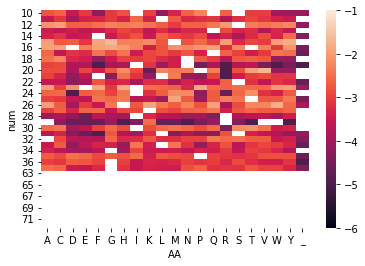

1.0286055194972177e-05


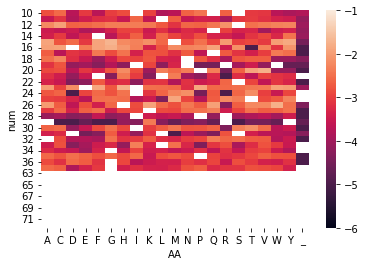

0.0


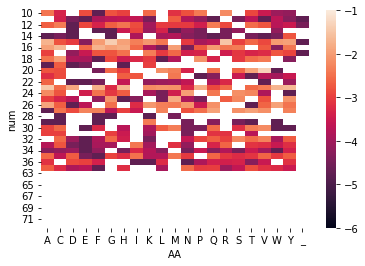

0.0


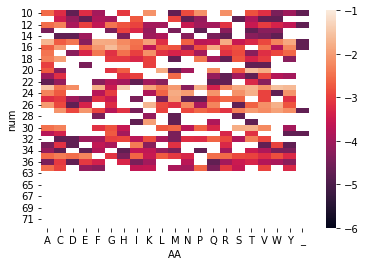

0.0


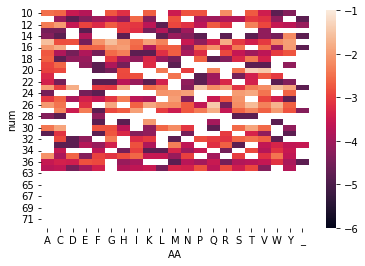

3.0470154483683232e-05


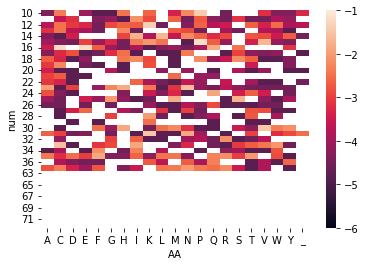

0.0


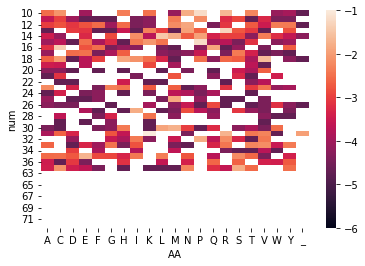

0.0


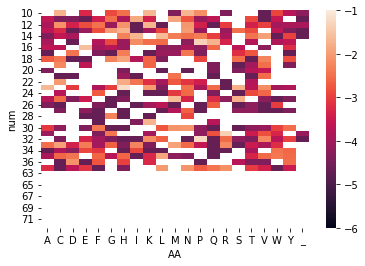

In [8]:
for df in dfs:
    print(df.loc[22, '_'])
    sns.heatmap(np.log10(df), vmin=-6, vmax=-1)
    plt.show()

In [10]:
writer = pd.ExcelWriter('specificcodons_singlemut.xlsx', engine='xlsxwriter')

for i, ps in enumerate(dfs):
    ps.to_excel(writer, sheet_name=samples[i])
    
writer.save()

In [11]:
fprime = 'CGAAGTTCGAGACGTACACCCG'
rprime = 'CGAATACGGCTTCCTTGAGACTCC'

target = 'CGAAGTTCGAGACGTACACCCGACTCACTACGGTCGCGTATGTCCAATCGAAACCCCTGAAGGTCCGAACATCGGTCTGATCAACTCTCTGTCCGTGTACGCACAGACTAACGAATACGGCTTCCTTGAGACTCC'

In [12]:
dics = []

targetstart = 1
targetend = len(target) - 2

for x in samples:
    print ('Working on sample ' +x)
    sn = pd.read_csv('data/'+x+'/barcodes_majority1.txt', sep='\t', header=None, names=['r', 'barcode', 'sequence', 'snvs', 'snv'])
    
    mut_dic = mut_dict.copy()
    
    j = 0
    for seq in sn.sequence:
        
        muts = []
        for i in range(targetstart, targetend, 3):
            
            codon = seq[i:i+3]
            
            if codon in table:
                if table[target[i:i+3]] != table[codon]:
                    mut = str(int(i/3) + 46) + '_' + codon
                    muts.append(mut)

                    #if (int(i/3) == 22) and (table[codon] == '_'):
                    #    print(seq)
            
        muts = ', '.join(muts)
        #print(muts)

        if muts in mut_dic:
            mut_dic[muts] += 1
        else:
            mut_dic[''] += 1
        
    dics.append(mut_dic)

Working on sample ky01
Working on sample ky02
Working on sample ky03
Working on sample ky04
Working on sample ky05
Working on sample ky06
Working on sample ky07
Working on sample ky08
Working on sample ky09
Working on sample ky10
Working on sample ky11
Working on sample ky12
Working on sample ky13
Working on sample ky14
Working on sample ky15


In [13]:
dfs = []

for mut_dic in dics:
    
    df = pd.DataFrame.from_dict(mut_dic, orient='index').reset_index()
    #df.iloc[:, 1] = df.iloc[:, 1]/df.iloc[:, 1].sum()
    
    df.loc[:,'AA'] = df['index'].str.split('_').str[1]
    aa = []
    for a in df.loc[:,'AA']:
        if a in table:
            aa.append(table[a])
        else:
            aa.append('')
    df.loc[:,'AA'] = aa
    
    df.loc[:,'num'] = df['index'].str.split('_').str[0]
    df = df[['num', 'AA', 0]]
    df.columns = ['num', 'AA', 'occurences']

    df['num'] = pd.to_numeric(df.num)
    df = df[~df.num.isna()]
    df = df.pivot_table(index='num', columns='AA', values='occurences')
    df.index = df.index.astype(int)
    
    df = df/df.sum().sum()
    
    dfs.append(df)

0.0


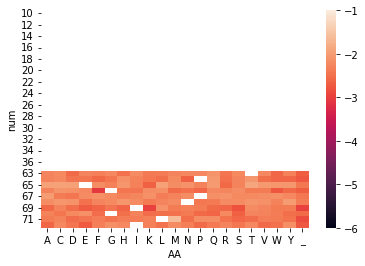

0.0


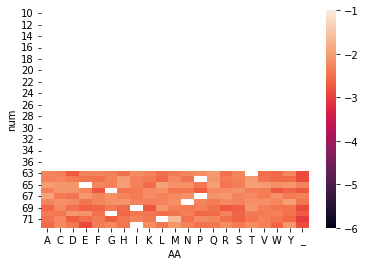

0.0


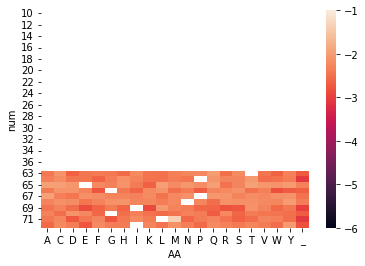

0.0


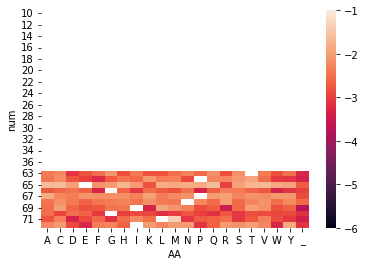

0.0


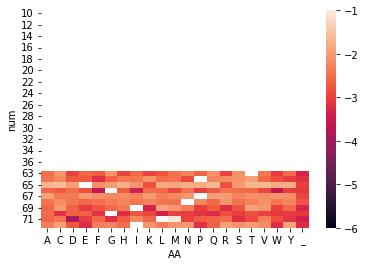

0.0


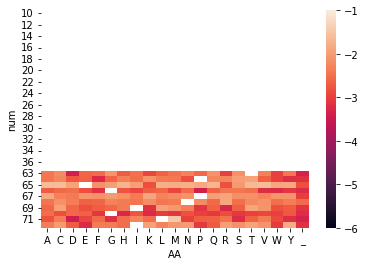

0.0


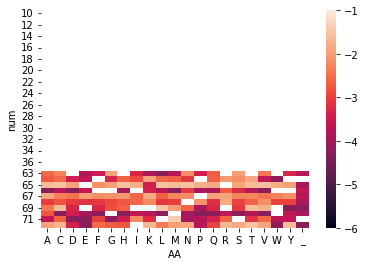

0.0


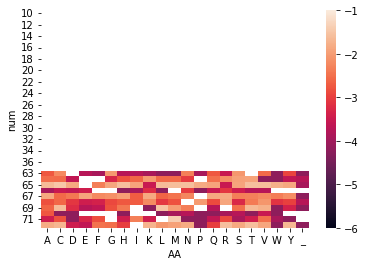

0.0


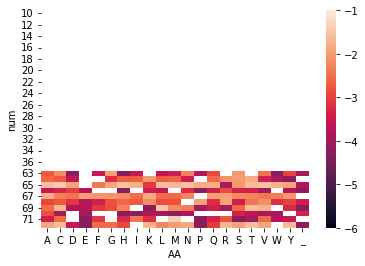

0.0


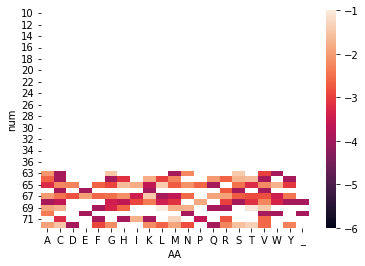

0.0


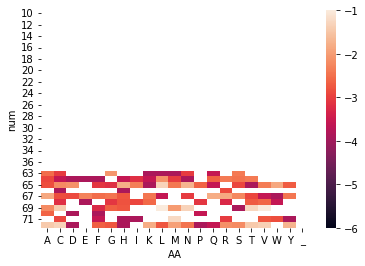

0.0


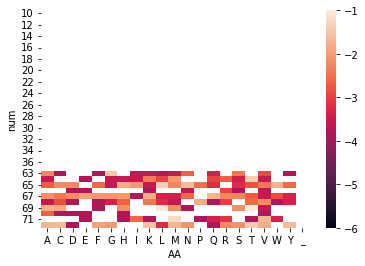

0.0


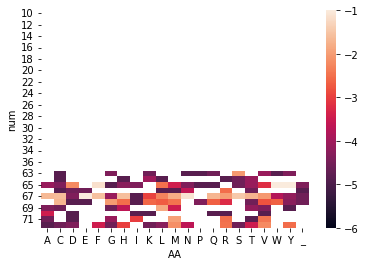

0.0


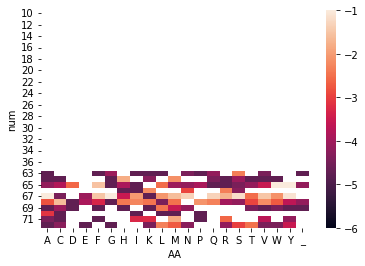

0.0


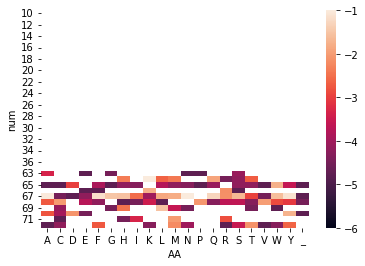

In [36]:
for df in dfs:
    print(df.loc[22, '_'])
    sns.heatmap(np.log10(df), vmin=-6, vmax=-1)
    plt.show()

In [14]:
writer = pd.ExcelWriter('specificcodons_singlemut_bin4.xlsx', engine='xlsxwriter')

for i, ps in enumerate(dfs):
    ps.to_excel(writer, sheet_name=samples[i])
    
writer.save()

In [15]:
#fix tables

#fill non wt pos with 0, keep wt pos nan

target = 'GCAGTGAAAGAGTTCTTCGGTTCCAGCCAGCTGTCTCAGTTTATGGACCAGAACAACCCGCTGTCTGAGATTACGCACAAACGTCGTATCTCCGCACTCGGCCCAGGCGGTCTGACCCGTGAACGTGCA'
target_bin4 = 'CGAAGTTCGAGACGTACACCCGACTCACTACGGTCGCGTATGTCCAATCGAAACCCCTGAAGGTCCGAACATCGGTCTGATCAACTCTCTGTCCGTGTACGCACAGACTAACGAATACGGCTTCCTTGAGACTCC'

table = { 
            'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
            'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
            'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
            'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
            'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
            'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
            'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
            'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
            'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
            'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
            'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
            'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
            'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
            'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
            'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
            'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W', 
        } 

aa = ''
aa_bin4 = ''

for i in range(0, len(target), 3):
    aa += table[target[i:i+3]]
    
for i in range(1, len(target_bin4) - 2, 3):
    aa_bin4 += table[target_bin4[i:i+3]]

In [16]:
#load
samples = ['ky01', 'ky02', 'ky03', 'ky04', 'ky05', 'ky06', 'ky07', 'ky08', 'ky09', 'ky10', 'ky11', 'ky12', 'ky13', 'ky14', 'ky15']
samples_bin4 = ['ky01', 'ky02', 'ky03', 'ky04', 'ky05', 'ky06', 'ky07', 'ky08', 'ky09', 'ky10', 'ky11', 'ky12', 'ky13', 'ky14', 'ky15']

psas = []

for i, s in enumerate(zip(samples, samples_bin4)):
    bin1 = pd.read_excel(open('specificcodons_singlemut.xlsx', 'rb'), sheet_name=s[0], index_col=None)
    psas.append(bin1)

In [17]:
npsas = []
for p in psas:
    p = p.fillna(0)
    for i in p.num:
        if i < 38:
            p.loc[p.num == i, aa[i-1]] = np.NaN
    npsas.append(p)

0.0009729920981247789


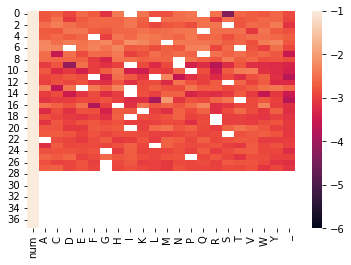

0.0009651404361126106


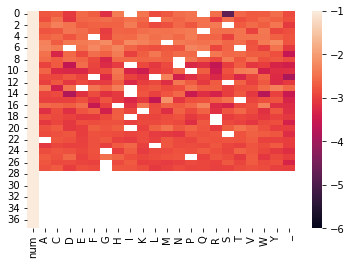

0.001056608606557377


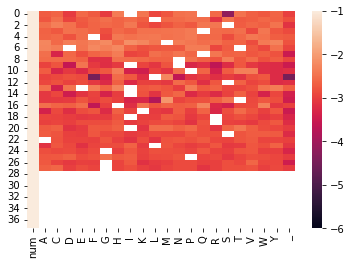

0.0002583768494342907


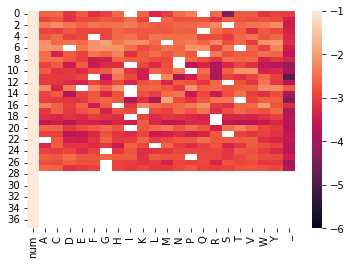

0.0002501518779258836


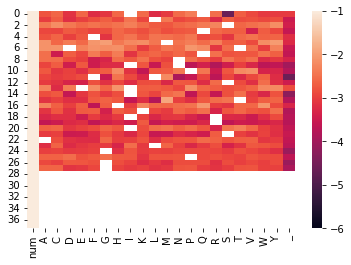

0.0001733102253032929


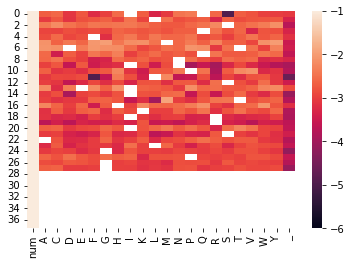

0.0


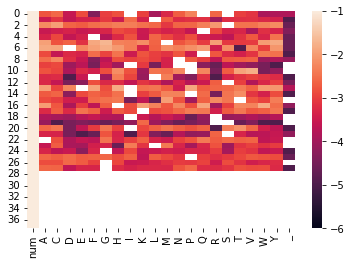

4.484003318162455e-05


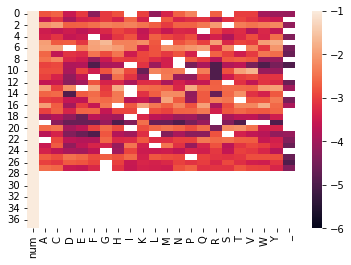

1.028605519497218e-05


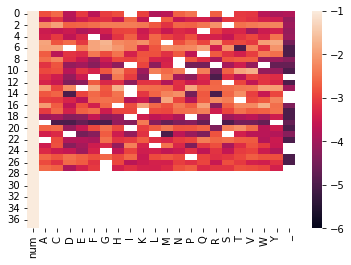

0.0


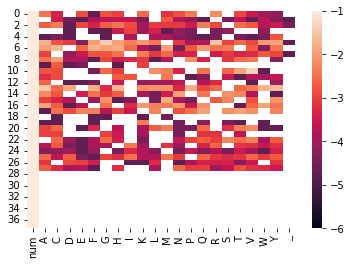

0.0


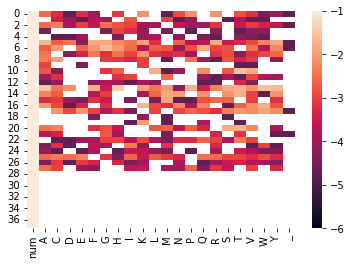

0.0


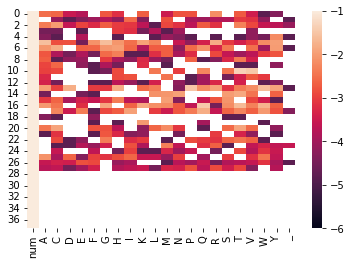

0.0


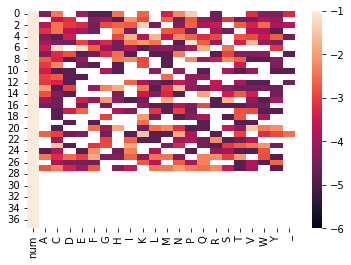

0.0


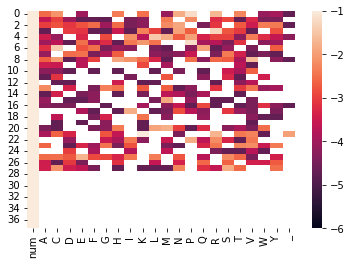

2.055794256110849e-05


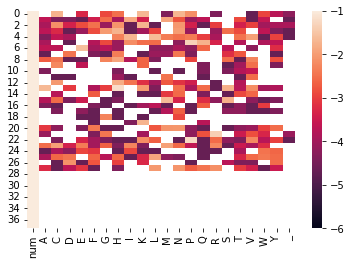

In [18]:
for df in npsas:
    print(df.loc[22, '_'])
    sns.heatmap(np.log10(df), vmin=-6, vmax=-1)
    plt.show()

In [18]:
writer = pd.ExcelWriter('specificcodons_singlemut_fix.xlsx', engine='xlsxwriter')

for i, ps in enumerate(npsas):
    ps.to_excel(writer, sheet_name=samples[i])
    
writer.save()

In [19]:
psas = []

for i, s in enumerate(zip(samples, samples_bin4)):
    bin4 = pd.read_excel(open('specificcodons_singlemut_bin4.xlsx', 'rb'), sheet_name=s[1], index_col=None)
    psas.append(bin4)

In [20]:
npsas = []
for p in psas:
    p = p.fillna(0)
    for i in p.num:
        if i >= 38:
            p.loc[p.num == i, aa_bin4[i-46]] = np.NaN
    npsas.append(p)

0.0


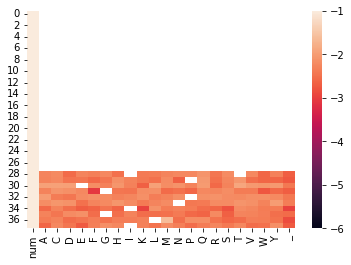

0.0


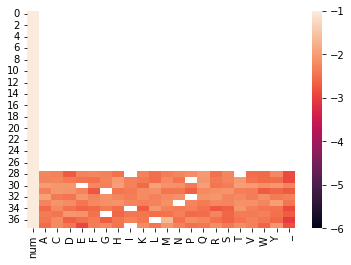

0.0


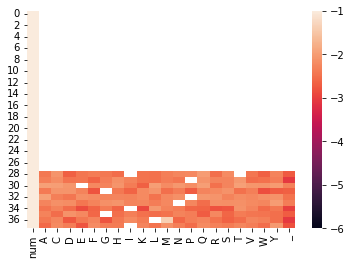

0.0


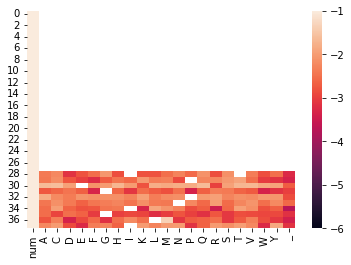

0.0


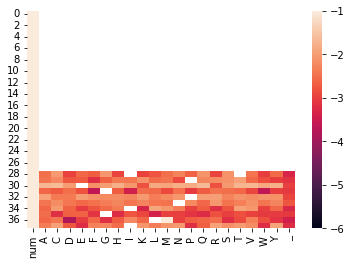

0.0


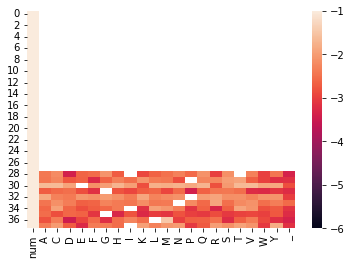

0.0


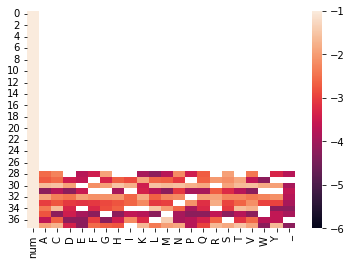

0.0


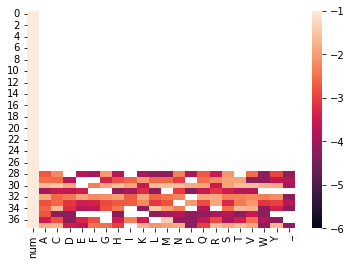

0.0


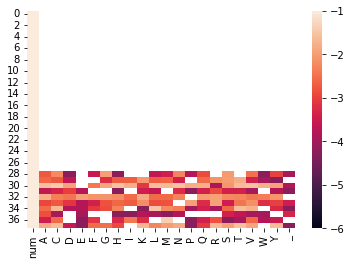

0.0


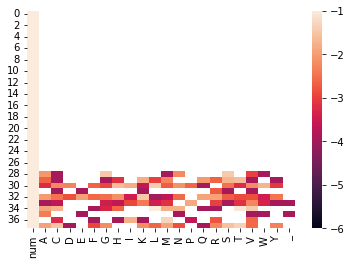

0


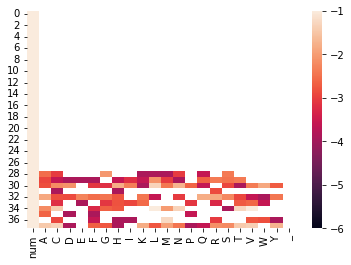

0


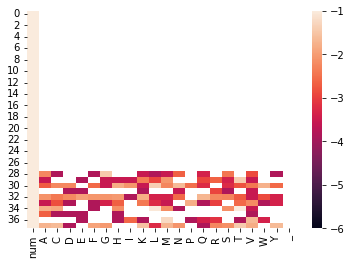

0.0


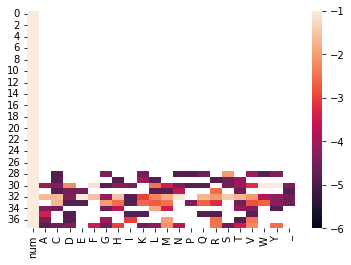

0.0


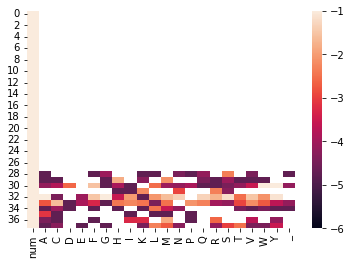

0.0


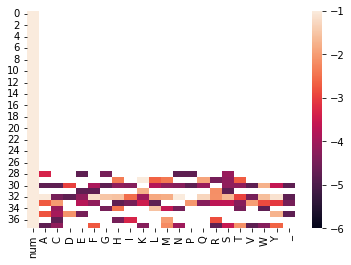

In [22]:
for df in npsas:
    print(df.loc[22, '_'])
    sns.heatmap(np.log10(df), vmin=-6, vmax=-1)
    plt.show()

In [21]:
writer = pd.ExcelWriter('specificcodons_singlemut_bin4_fix.xlsx', engine='xlsxwriter')

for i, ps in enumerate(npsas):
    ps.to_excel(writer, sheet_name=samples[i])
    
writer.save()